<a href="https://colab.research.google.com/github/rzagni/ML-Models/blob/main/hidden-layer-multiclass-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [3]:
iris = fetch_ucirepo(id=53)
iris_df = iris.data.original
iris_df = iris_df.sample(frac=1, random_state=42).reset_index(drop=True)
iris_df

,sepal length,sepal width,petal length,petal width,class
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,3.8,1.7,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,6.0,2.9,4.5,1.5,Iris-versicolor
4,6.8,2.8,4.8,1.4,Iris-versicolor
...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,Iris-versicolor
146,4.9,2.5,4.5,1.7,Iris-virginica
147,5.8,4.0,1.2,0.2,Iris-setosa
148,5.8,2.6,4.0,1.2,Iris-versicolor


In [4]:
X = iris_df[['sepal length', 'petal length']]
y = [0 if label == "Iris-setosa" else 1 if label == "Iris-versicolor" else 2 for label in iris_df['class']]

In [5]:
X_train = X[:125]
X_test = X[125:]

y_train = y[:125]
y_test = y[125:]

In [6]:
X_test.reset_index(drop=True, inplace=True)

In [7]:
print("Datasets lenghts\n")
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")

Datasets lenghts

X_train: 125
X_test: 25
y_train: 125
y_test: 25


In [11]:
import numpy as np

np.random.seed(42)

# Set non-zero initial weights
rnd_multiplier = 0.1
w11 = np.random.rand() * rnd_multiplier
w12 = np.random.rand() * rnd_multiplier
w21 = np.random.rand() * rnd_multiplier
w22 = np.random.rand() * rnd_multiplier
b1 = .0
b2 = .0


v11 = np.random.rand() * rnd_multiplier
v21 = np.random.rand() * rnd_multiplier
v31 = np.random.rand() * rnd_multiplier
v12 = np.random.rand() * rnd_multiplier
v22 = np.random.rand() * rnd_multiplier
v32 = np.random.rand() * rnd_multiplier
v13 = np.random.rand() * rnd_multiplier
v23 = np.random.rand() * rnd_multiplier
v33 = np.random.rand() * rnd_multiplier
c1 = .0
c2 = .0
c3 = .0


learning_rate = 0.001
accuracy = []
epoch_print_cnt = 100
epochs = 1000

for epoch in range(epochs):
    accurate = 0

    for i in range(len(X_train)):
        # Forward pass for input layer
        Z1 = w11 * X_train['sepal length'][i] + w12 * X_train['petal length'][i] + b1
        Z2 = w21 * X_train['sepal length'][i] + w22 * X_train['petal length'][i] + b2

        # Activation Function
        Z1 = max(0, Z1)
        Z2 = max(0, Z2)

        # Forward pass for output layer
        V1 = v11 * Z1 + v21 * Z2 + c1
        V2 = v12 * Z1 + v22 * Z2 + c2
        V3 = v13 * Z1 + v23 * Z2 + c3

        V = np.array([V1, V2, V3])

        # Softmax computation
        exp_V = np.exp(V)
        total_outputs = np.sum(exp_V)
        probabilities = exp_V / total_outputs

        y_hat_idx = np.argmax(probabilities)

        # Gradient calculation for the output layer
        gradV1 = probabilities[0] - (1 if y_train[i] == 0 else 0)
        gradV2 = probabilities[1] - (1 if y_train[i] == 1 else 0)
        gradV3 = probabilities[2] - (1 if y_train[i] == 2 else 0)

        # Update output layer weights
        v11 -= learning_rate * gradV1 * Z1
        v21 -= learning_rate * gradV1 * Z2
        v12 -= learning_rate * gradV2 * Z1
        v22 -= learning_rate * gradV2 * Z2
        v13 -= learning_rate * gradV3 * Z1
        v23 -= learning_rate * gradV3 * Z2

        c1 -= learning_rate * gradV1
        c2 -= learning_rate * gradV2
        c3 -= learning_rate * gradV3

        # Backpropagate to the hidden layer
        gradZ1 = (gradV1 * v11 + gradV2 * v12 + gradV3 * v13) * (1 if Z1 > 0 else 0)
        gradZ2 = (gradV1 * v21 + gradV2 * v22 + gradV3 * v23) * (1 if Z2 > 0 else 0)

        # Gradient calculation for the first layer weights
        grad_w11 = gradZ1 * X_train['sepal length'][i]
        grad_w12 = gradZ1 * X_train['petal length'][i]
        grad_w21 = gradZ2 * X_train['sepal length'][i]
        grad_w22 = gradZ2 * X_train['petal length'][i]
        grad_b1 = gradZ1
        grad_b2 = gradZ2

        # Update first layer weights
        w11 -= learning_rate * grad_w11
        w12 -= learning_rate * grad_w12
        w21 -= learning_rate * grad_w21
        w22 -= learning_rate * grad_w22
        b1 -= learning_rate * grad_b1
        b2 -= learning_rate * grad_b2

        # Count correct predictions (assuming you have y_hat_idx from argmax on probabilities)
        if y_train[i] == y_hat_idx:
            accurate += 1

    # Calculate and log accuracy for this epoch
    epoch_accuracy = accurate / len(X_train)
    accuracy.append(epoch_accuracy)

    if (epoch + 1) % epoch_print_cnt == 0:
        print(f"Epoch: {epoch + 1} -> Accuracy: {epoch_accuracy:.4f}")

print("\nFinal Weights and Biases:")

# First layer weights and biases
print(f"W11: {w11}, W12: {w12}")
print(f"W21: {w21}, W22: {w22}")
print(f"B1: {b1}, B2: {b2}")

# Output layer weights and biases
print(f"V11: {v11}, V21: {v21}, V31: {v31}")
print(f"V12: {v12}, V22: {v22}, V32: {v32}")
print(f"V13: {v13}, V23: {v23}, V33: {v33}")
print(f"C1: {c1}, C2: {c2}, C3: {c3}")



Epoch: 100 -> Accuracy: 0.7600
Epoch: 200 -> Accuracy: 0.9200
Epoch: 300 -> Accuracy: 0.9520
Epoch: 400 -> Accuracy: 0.9440
Epoch: 500 -> Accuracy: 0.9440
Epoch: 600 -> Accuracy: 0.9440
Epoch: 700 -> Accuracy: 0.9440
Epoch: 800 -> Accuracy: 0.9440
Epoch: 900 -> Accuracy: 0.9440
Epoch: 1000 -> Accuracy: 0.9440

Final Weights and Biases:
W11: -0.644580760809802, W12: 2.0092355795485153
W21: -1.2374285837907484, W22: 2.3061823715617997
B1: -0.18185664702964827, B2: -2.0331573871019133
V11: -1.5921631605581703, V21: -0.9943004143781972, V31: 0.005808361216819946
V12: 1.1215895307053865, V22: -1.231127203761465, V32: 0.07080725777960455
V13: 0.5748515579041611, V23: 2.3981295565637972, V33: 0.08324426408004218
C1: 3.517069758697814, C2: -0.41913639503848876, C3: -3.097933363659277


In [36]:
weights = [w11, w12, w21, w22]
biases = [b1, b2]
output_weights = [v11, v21, v31, v12, v22, v32, v13, v23, v33]
output_biases = [c1, c2, c3]

predictions = []
class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

for i in range(len(X_test)):
    # First layer computation
    Z1 = w11 * X_test['sepal length'][i] + w12 * X_test['petal length'][i] + b1
    Z2 = w21 * X_test['sepal length'][i] + w22 * X_test['petal length'][i] + b2

    # Apply ReLU activation
    Z1 = max(0, Z1)
    Z2 = max(0, Z2)

    # Output layer computation
    V1 = v11 * Z1 + v21 * Z2 + c1
    V2 = v12 * Z1 + v22 * Z2 + c2
    V3 = v13 * Z1 + v23 * Z2 + c3

    # Stabilize softmax by subtracting the max value
    V = np.array([V1, V2, V3])
    V_stable = V - np.max(V)
    exp_V = np.exp(V_stable)
    total_outputs = np.sum(exp_V)
    probabilities = exp_V / total_outputs

    # Predicted class
    y_hat = np.argmax(probabilities)
    predictions.append(y_hat)

# Map predictions and actual classes to class names
predicted_class_names = [class_names[y_hat] for y_hat in predictions]
actual_class_names = [class_names[y] for y in y_test]

# Calculate and print the accuracy and prediction details
accurate = 0
inaccurate = 0
total = len(predictions)

print("Predicted  Actual  Outcome  Predicted Class      Actual Class")
print("---------  ------  -------  ---------------      -------------")
for i, (pred, actual) in enumerate(zip(predictions, y_test)):
    if pred == actual:
        accurate += 1
        outcome = '\u2713'
    else:
        outcome = '\u2717'
        inaccurate += 1
    print(f"    {pred}         {actual}       {outcome}     {predicted_class_names[i]:>15}      {actual_class_names[i]}")

# Calculate and print test accuracy
test_accuracy = accurate / len(X_test)
print(f"\nAccuracy: {test_accuracy:.4f} | Accurate Count: {accurate} | Inaccurate Count: {inaccurate}")


Predicted  Actual  Outcome  Predicted Class      Actual Class
---------  ------  -------  ---------------      -------------
    1         1       ✓     Iris-versicolor      Iris-versicolor
    2         2       ✓      Iris-virginica      Iris-virginica
    2         2       ✓      Iris-virginica      Iris-virginica
    0         0       ✓         Iris-setosa      Iris-setosa
    1         1       ✓     Iris-versicolor      Iris-versicolor
    2         2       ✓      Iris-virginica      Iris-virginica
    2         2       ✓      Iris-virginica      Iris-virginica
    0         0       ✓         Iris-setosa      Iris-setosa
    2         2       ✓      Iris-virginica      Iris-virginica
    0         0       ✓         Iris-setosa      Iris-setosa
    1         1       ✓     Iris-versicolor      Iris-versicolor
    2         2       ✓      Iris-virginica      Iris-virginica
    2         2       ✓      Iris-virginica      Iris-virginica
    1         1       ✓     Iris-versicolor      

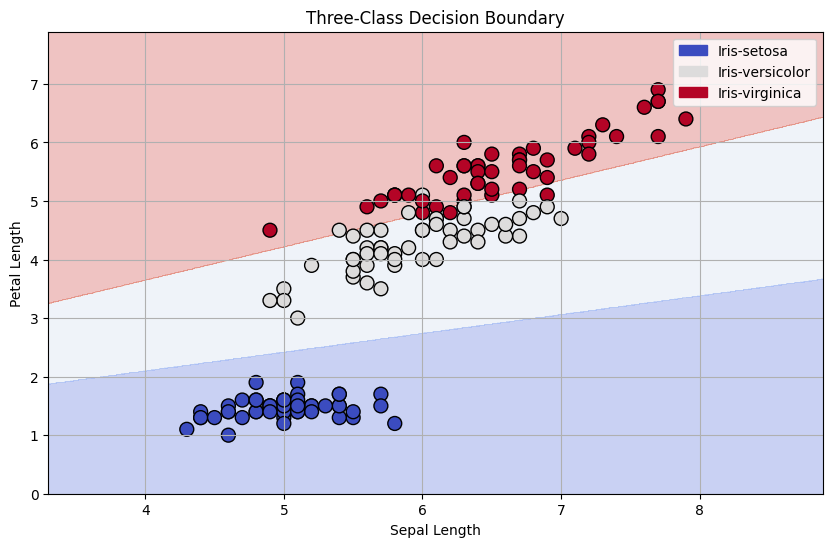

In [14]:
import torch
import torch.nn as nn
from torch.optim import Adam

In [15]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


In [16]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [23]:
layers = [
    nn.Linear(2,2),
    nn.ReLU(),
    nn.Linear(2,3)
]
model = nn.Sequential(*layers)
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())


In [24]:
model = nn.Sequential(*layers)
model = model.to(device)

In [25]:
def get_batch_accuracy(output, y):
    pred = output.argmax(dim=1, keepdim=True)  # Get predictions
    correct = pred.eq(y.view_as(pred)).sum().item()  # Check if predictions match targets
    return correct


In [26]:
def train():
    total_loss = 0
    total_correct = 0
    total_samples = len(X_train_tensor)

    model.train()
    for x, y in zip(X_train_tensor, y_train_tensor):
        x, y = x.to(device).unsqueeze(0), y.to(device)  # Add batch dimension
        output = model(x)

        optimizer.zero_grad()
        batch_loss = loss_function(output, y.unsqueeze(0))  # Add batch dimension for loss calculation
        batch_loss.backward()
        optimizer.step()

        total_loss += batch_loss.item()
        total_correct += get_batch_accuracy(output, y)

    accuracy = total_correct / total_samples
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(total_loss, accuracy))


In [27]:
epochs = 60
for epoch in range(epochs):

    print('Epoch: {}'.format(epoch))
    train()


Epoch: 0
Train - Loss: 137.5807 Accuracy: 0.4480
Epoch: 1
Train - Loss: 132.4742 Accuracy: 0.3200
Epoch: 2
Train - Loss: 130.4468 Accuracy: 0.2640
Epoch: 3
Train - Loss: 128.4707 Accuracy: 0.3680
Epoch: 4
Train - Loss: 126.2693 Accuracy: 0.4320
Epoch: 5
Train - Loss: 123.8151 Accuracy: 0.5440
Epoch: 6
Train - Loss: 121.0993 Accuracy: 0.5760
Epoch: 7
Train - Loss: 118.1206 Accuracy: 0.5840
Epoch: 8
Train - Loss: 114.8885 Accuracy: 0.6160
Epoch: 9
Train - Loss: 111.4269 Accuracy: 0.6240
Epoch: 10
Train - Loss: 107.7742 Accuracy: 0.6160
Epoch: 11
Train - Loss: 103.9824 Accuracy: 0.6160
Epoch: 12
Train - Loss: 100.1132 Accuracy: 0.6400
Epoch: 13
Train - Loss: 96.2332 Accuracy: 0.6640
Epoch: 14
Train - Loss: 92.4077 Accuracy: 0.6880
Epoch: 15
Train - Loss: 88.6951 Accuracy: 0.7040
Epoch: 16
Train - Loss: 85.1429 Accuracy: 0.7040
Epoch: 17
Train - Loss: 81.7850 Accuracy: 0.7200
Epoch: 18
Train - Loss: 78.6416 Accuracy: 0.7520
Epoch: 19
Train - Loss: 75.7207 Accuracy: 0.7680
Epoch: 20
Train -

In [31]:
def validate(model, X_test_tensor, y_test_tensor):
    model.eval()  # Set the model to evaluation mode
    accurate = 0
    inaccurate = 0
    total_samples = len(X_test_tensor)
    predictions = []



    with torch.no_grad():  # Disable gradient calculation
        for x, y in zip(X_test_tensor, y_test_tensor):
            x = x.to(device).unsqueeze(0)  # Add batch dimension
            y = y.to(device).unsqueeze(0)  # Add batch dimension

            output = model(x)
            pred = output.argmax(dim=1, keepdim=True).item()  # Get the predicted class

            predictions.append(pred)

            if pred == y.item():
                accurate += 1
                outcome = '\u2713'  # Checkmark for correct prediction
            else:
                outcome = '\u2717'  # Cross for incorrect prediction
                inaccurate += 1

    predicted_class_names = [class_names[y_hat] for y_hat in predictions]
    actual_class_names = [class_names[y] for y in y_test]

    test_accuracy = accurate / total_samples
    print(f"Accuracy: {test_accuracy:.4f} Accurate Cnt: {accurate} Inaccurate Cnt: {inaccurate}")

    # Print detailed predictions
    print("Predicted  Actual  Outcome  Predicted Class  Actual Class")
    print("---------  ------  -------  ---------------  ---------------")
    for i, (pred, actual) in enumerate(zip(predictions, y_test_tensor)):
        print(f"    {pred}         {actual.item()}       {outcome}     {predicted_class_names[pred]:>15}  {actual_class_names[actual.item()]}")


In [ ]:
validate(model, X_test_tensor, y_test_tensor)

Accuracy: 1.0000 Accurate Cnt: 25 Inaccurate Cnt: 0
Predicted  Actual  Outcome  Predicted Class  Actual Class
---------  ------  -------  ---------------  ---------------
    1         1       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    0         0       ✓     Iris Versicolor  Iris Versicolor
    1         1       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    0         0       ✓     Iris Versicolor  Iris Versicolor
    2         2       ✓      Iris Virginica  Iris Virginica
    0         0       ✓     Iris Versicolor  Iris Versicolor
    1         1       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    2         2       ✓      Iris Virginica  Iris Virginica
    1         1       ✓      Iris Virginica  I

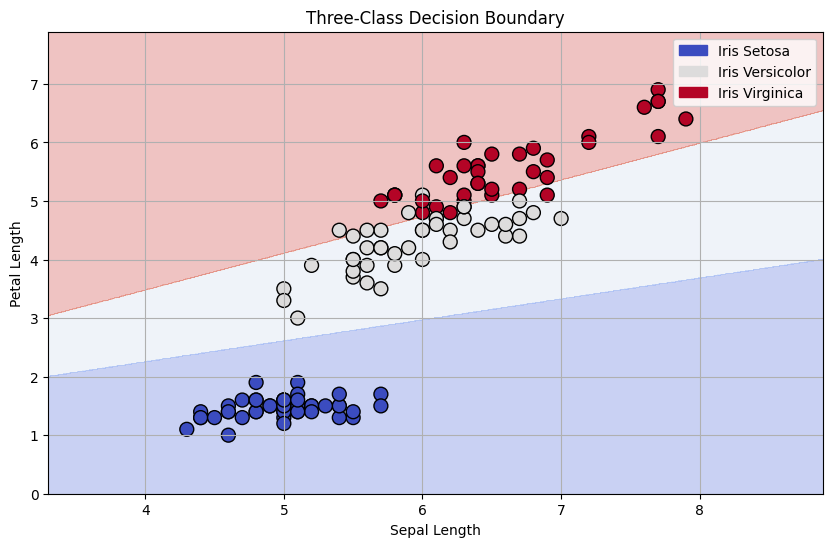

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

# Define mesh grid limits
x_min, x_max = X_train['sepal length'].min() - 1, X_train['sepal length'].max() + 1
y_min, y_max = X_train['petal length'].min() - 1, X_train['petal length'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten grid for batch processing
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Access weights and biases from the trained PyTorch model
# Extract weights and biases for both layers
with torch.no_grad():
    # First layer weights and biases
    weights1 = model[0].weight.detach().cpu().numpy()
    biases1 = model[0].bias.detach().cpu().numpy()

    # Second layer weights and biases
    weights2 = model[2].weight.detach().cpu().numpy()
    biases2 = model[2].bias.detach().cpu().numpy()

# First layer computation (hidden layer with ReLU activation)
Z1 = np.dot(grid_points, weights1.T) + biases1
Z1 = np.maximum(0, Z1)  # Apply ReLU

# Second layer computation (output layer)
Z2 = np.dot(Z1, weights2.T) + biases2

# Reshape to match the grid shape
Z2 = Z2.T.reshape(3, xx.shape[0], xx.shape[1])

# Apply softmax with stabilization
Z_max = np.max(Z2, axis=0, keepdims=True)  # Maximum for stabilization
exp_Z = np.exp(Z2 - Z_max)  # Subtract max before exponentiating
probabilities = exp_Z / np.sum(exp_Z, axis=0)  # Softmax across classes
decision_boundary = np.argmax(probabilities, axis=0)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, decision_boundary, alpha=0.3, cmap='coolwarm')

# Plot the training data points
scatter = plt.scatter(X_train['sepal length'], X_train['petal length'], c=y_train, edgecolor='k', s=100, cmap='coolwarm')

# Class names for legend
class_names = ["Iris Setosa", "Iris Versicolor", "Iris Virginica"]
plt.title('Three-Class Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Create custom legend
legend_patches = [patches.Patch(color=scatter.cmap(scatter.norm(i)), label=class_names[i]) for i in range(len(class_names))]
plt.legend(handles=legend_patches)

plt.grid()
plt.show()
